<a href="https://colab.research.google.com/github/kboodlal/Machine_Learning_Blog_Code/blob/master/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import os
import pandas
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
path = '/content/drive/My Drive/Colab Notebooks/'
news_data = os.path.join(path, 'news.csv')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(6335, 4)


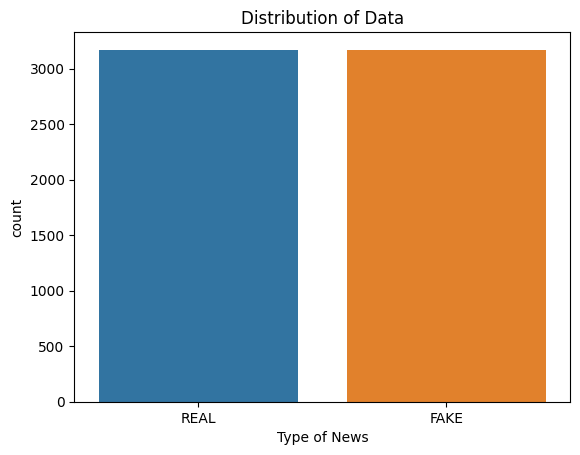

In [4]:
news = pandas.read_csv(news_data, index_col=0)
news = news.sample(frac=1)
news.reset_index(inplace=True)
news.drop(['title'], axis=1)
print(news.shape)
sns.countplot(data=news,
               x='label',
              order=news['label'].value_counts().index)
plt.xlabel("Type of News")
plt.title("Distribution of Data")
plt.show()

Accuracy 93.43434343434343


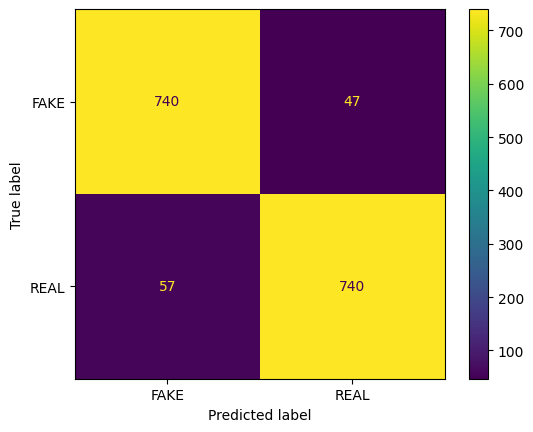

In [6]:
x_train, x_test, y_train, y_test = train_test_split(news['text'],
                                                    news['label'],
                                                    test_size=0.25, random_state=10)
vectorizer = TfidfVectorizer(stop_words='english', max_df=.9)
train = vectorizer.fit_transform(x_train)
test = vectorizer.transform(x_test)
classifier = PassiveAggressiveClassifier(max_iter=100)
classifier.fit(train, y_train)
pred = classifier.predict(test)
print('Accuracy', accuracy_score(y_test, pred) * 100)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['FAKE', 'REAL'])
disp.plot()
plt.show()